Pada Tugas kali ini kita akan membuat 4 function yang memiliki fungsinya masing-masing.
Data yang diambil berasal dari berkas imdb_movie.db

Jika ada proses yang dilakukan boleh dilakukan dari query sql, atau menggunakan python setelah semua data ditampilkan menggunakan sql.

disarankan untuk menggunakan metode groupby jika mengolah di dalam sql atau pandas.groupby jika pada fungsi pythonnya

In [ ]:
#Taruh semua library/package dsini
import sqlite3 as sq
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#Pada sel ini peserta diminta untuk melakukan koneksi terhadap database.

db = sq.connect('imdb_movie.db')

1. Peserta diminta untuk membuat sebuah fungsi yang tugasnya adalah untuk menampilkan 5 direktur dengan jumlah film terbanyak dalam daftar. Data tersebut akan menampilkan secara terurut dari urutan 1 (paling banyak) ke 5.

In [ ]:
def most_maker_director():
  query = '''
  SELECT director_name, COUNT(movie_title) AS number_of_movies
  FROM movies
  WHERE director_name IS NOT NULL
  GROUP BY director_name
  ORDER BY number_of_movies DESC
  LIMIT 5;
  '''

  cursor_db = db.cursor()
  cursor_db.execute(query)
  result = cursor_db.fetchall()
  cursor_db.close()
  return result

In [ ]:
most_maker_director()

[('Steven Spielberg', 26),
 ('Woody Allen', 22),
 ('Martin Scorsese', 20),
 ('Clint Eastwood', 20),
 ('Ridley Scott', 17)]

2. Peserta diminta untuk membuat sebuah fungsi yang tugasnya adalah untuk menampilkan 10 direktur dengan total jumlah pendapatan terbesar untuk semua film yang dia buat. Data tersebut akan menampilkan secara terurut dari urutan 1 (paling banyak) ke 10 beserta total pendapatan dari masing-masing direktur.

Pendapatan bisa didapatkan dari nilai gross

In [ ]:
def most_profitable_director():
  query = '''
  SELECT director_name, SUM(gross) AS total_gross
  FROM movies
  GROUP BY director_name
  ORDER BY total_gross DESC
  LIMIT 10;
  '''

  cursor_db = db.cursor()
  cursor_db.execute(query)
  result = cursor_db.fetchall()
  cursor_db.close()
  return result

In [ ]:
most_profitable_director()

[('Steven Spielberg', 4114233101.0),
 ('Peter Jackson', 2592969279.0),
 ('Michael Bay', 2231242537.0),
 ('Tim Burton', 2071275480.0),
 ('Sam Raimi', 2049549198.0),
 ('James Cameron', 1948125910.0),
 ('Christopher Nolan', 1813227576.0),
 ('George Lucas', 1741418480.0),
 ('Joss Whedon', 1730886628.0),
 ('Robert Zemeckis', 1619309108.0)]

3. Peserta diminta untuk membuat sebuah fungsi yang tugasnya adalah untuk menampilkan 15 film dengan pendapatan terbesar. Data tersebut akan menampilkan secara terurut dari urutan 1 (paling banyak) ke 15 beserta pendapatan dari masing-masing film

In [ ]:
def most_profitable_movie():
  query = '''
  SELECT movie_title, gross
  FROM movies
  ORDER BY gross DESC
  LIMIT 15;
  '''
  cursor_db = db.cursor()
  cursor_db.execute(query)
  result = cursor_db.fetchall()
  cursor_db.close()
  return result

In [ ]:
most_profitable_movie()

[('Avatar�', 760505847.0),
 ('Titanic�', 658672302.0),
 ('Jurassic World�', 652177271.0),
 ('The Avengers�', 623279547.0),
 ('The Avengers�', 623279547.0),
 ('The Dark Knight�', 533316061.0),
 ('Star Wars: Episode I - The Phantom Menace�', 474544677.0),
 ('Star Wars: Episode IV - A New Hope�', 460935665.0),
 ('Avengers: Age of Ultron�', 458991599.0),
 ('The Dark Knight Rises�', 448130642.0),
 ('Shrek 2�', 436471036.0),
 ('E.T. the Extra-Terrestrial�', 434949459.0),
 ('The Hunger Games: Catching Fire�', 424645577.0),
 ("Pirates of the Caribbean: Dead Man's Chest�", 423032628.0),
 ('The Lion King�', 422783777.0)]

4. Peserta diminta untuk membuat sebuah fungsi yang tugasnya adalah untuk menampilkan plot distribusi budget dari semua film pada tahun yang ditentukan. fungsi ini memiliki input, yaitu adalah tahun.

In [ ]:
def budget_distribution(year):
  query = '''
  SELECT budget
  FROM movies
  WHERE title_year = :year
  AND budget IS NOT NULL
  '''

  cursor_db = db.cursor()
  cursor_db.execute(query, (year,))
  budgets = pd.DataFrame(cursor_db.fetchall(), columns=['budget'])
  result = cursor_db.fetchall()

  plt.figure(figsize=(8, 3))
  plt.hist(budgets['budget'], bins=30, edgecolor='black')
  plt.title(f'Budget movie year {year}')
  plt.xlabel('Budget')
  plt.ylabel('Count')
  plt.grid(True)
  plt.show()

  cursor_db.close()

  return result

Semua sel di bawah digunakan untuk pemanggilan fungsi dan menunjukan hasil yang diharapkan.

In [ ]:
most_maker_director()

[('Steven Spielberg', 26),
 ('Woody Allen', 22),
 ('Martin Scorsese', 20),
 ('Clint Eastwood', 20),
 ('Ridley Scott', 17)]

output

1. Steven Spielberg
2. Woody Allen
3. Martin Scorsese
4. Clint Eastwood
5. Ridley Scott

In [ ]:
most_profitable_director()

[('Steven Spielberg', 4114233101.0),
 ('Peter Jackson', 2592969279.0),
 ('Michael Bay', 2231242537.0),
 ('Tim Burton', 2071275480.0),
 ('Sam Raimi', 2049549198.0),
 ('James Cameron', 1948125910.0),
 ('Christopher Nolan', 1813227576.0),
 ('George Lucas', 1741418480.0),
 ('Joss Whedon', 1730886628.0),
 ('Robert Zemeckis', 1619309108.0)]

output

1. Steven Spielberg - 4,114,233,101.00
2. Peter Jackson - 2,592,969,279.00
3. Michael Bay - 2,231,242,537.00
4. Tim Burton - 2,071,275,480.00
5. Sam Raimi - 2,049,549,198.00
6. James Cameron - 1,948,125,910.00
7. Christopher Nolan - 1,813,227,576.00
8. George Lucas - 1,741,418,480.00
9. Joss Whedon - 1,730,886,628.00
10. Robert Zemeckis - 1,619,309,108.00

In [ ]:
most_profitable_movie()

[('Avatar�', 760505847.0),
 ('Titanic�', 658672302.0),
 ('Jurassic World�', 652177271.0),
 ('The Avengers�', 623279547.0),
 ('The Avengers�', 623279547.0),
 ('The Dark Knight�', 533316061.0),
 ('Star Wars: Episode I - The Phantom Menace�', 474544677.0),
 ('Star Wars: Episode IV - A New Hope�', 460935665.0),
 ('Avengers: Age of Ultron�', 458991599.0),
 ('The Dark Knight Rises�', 448130642.0),
 ('Shrek 2�', 436471036.0),
 ('E.T. the Extra-Terrestrial�', 434949459.0),
 ('The Hunger Games: Catching Fire�', 424645577.0),
 ("Pirates of the Caribbean: Dead Man's Chest�", 423032628.0),
 ('The Lion King�', 422783777.0)]

output

1. Avatar  (2009) - 760,505,847.00
2. Titanic  (1997) - 658,672,302.00
3. Jurassic World  (2015) - 652,177,271.00
4. The Avengers  (2012) - 623,279,547.00
5. The Dark Knight  (2008) - 533,316,061.00
6. Star Wars: Episode I - The Phantom Menace  (1999) - 474,544,677.00
7. Star Wars: Episode IV - A New Hope  (1977) - 460,935,665.00
8. Avengers: Age of Ultron  (2015) - 458,991,599.00
9. The Dark Knight Rises  (2012) - 448,130,642.00
10. Shrek 2  (2004) - 436,471,036.00
11. E.T. the Extra-Terrestrial  (1982) - 434,949,459.00
12. The Hunger Games: Catching Fire  (2013) - 424,645,577.00
13. Pirates of the Caribbean: Dead Man's Chest  (2006) - 423,032,628.00
14. The Lion King  (1994) - 422,783,777.00
15. Toy Story 3  (2010) - 414,984,497.00

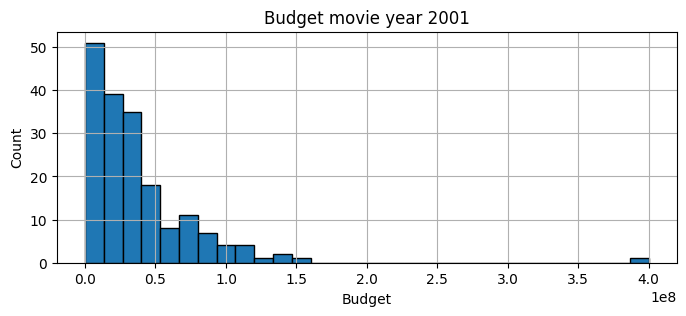

[]

In [ ]:
year = 2001
budget_distribution(2001)